In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [16, 6]

# Another random walk

We know if $B(t)$ is standard Brownian motion, with $B(0) = 0$,
then $\text{cov}[B(s), B(t)] = \min(s,t)$.
So, for $t_0 < t_1 < t_2 < \cdots < t_n$,
the covariance matrix for $(B(t_0), \ldots, B(t_n))$
is
$$ \Sigma_{ij} = \min(t_i, t_j) . $$

This means that we can sample locations along the path of Brownian motion
by sampling from a multivariate Normal.

*Note:* this is *not* the most straightforward way to do this
(better would be to simulate independent increments)
but this way we get to practice simulating correlated Gaussians.

In [37]:
def B(t):
    starts_at_zero = (t[0] == 0)
    if starts_at_zero:
        tt = t[1:]
    else:
        tt = t
    n = len(tt)
    sigma = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            sigma[i,j] = min(tt[i], tt[j])
    assert(np.all(sigma == sigma.T))
    chol_sigma = np.linalg.cholesky(sigma)
    z = np.random.normal(size=n)
    b = np.matmul(chol_sigma, z)
    if starts_at_zero:
        b = np.concatenate([[0.0], b])
    return b

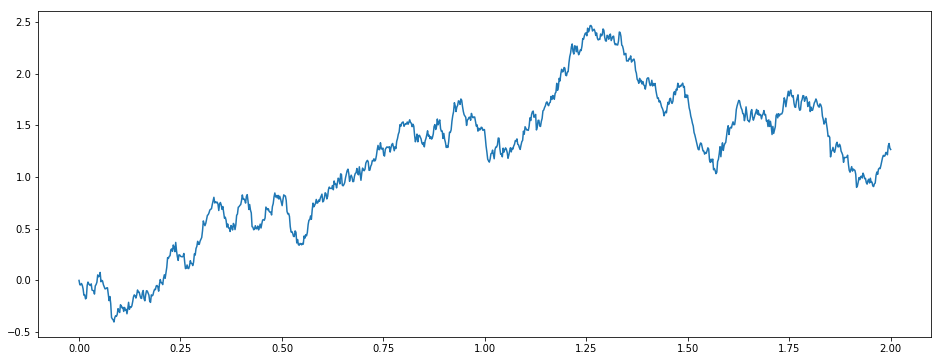

In [39]:
t = np.linspace(0, 2, 1000)
Bt = B(t)
fig, ax = plt.subplots()
ax.plot(t, Bt)